In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [9]:
ls

 50_Startups.csv          iris.csv
 bank-full1.csv           LabTAT.csv
 bank-full.csv            movie_assoc.csv
 BEML.csv                 Movie.csv
 book.csv                 my_movies.csv
 book_rec.csv             mywt.kmw.data-00000-of-00001
 BuyerRatio.csv           mywt.kmw.index
 Cars.csv                 negative-words.txt
 checkpoint               NLP-food-review.csv
 claimants.csv            pima-indians-diabetes.csv
 Company_Data.csv         positive-words.txt
 Costomer+OrderForm.csv   question1boxplot.png
 crime_data.csv           Question1piechart.png
 Cutlets.csv              Salary_Data.csv
 delivery_time.csv        SalaryData_Test.csv
 diabetes.csv             SalaryData_Train.csv
 EastWestAirlines.xlsx    statistics1.csv
 Elon_musk.csv            statistics1.xlsx
 Elon_musk_p_n.csv        stop.txt
 fig.jpg                  stop.xlsx
'forestfires(1).csv'      Titanic.csv
 forestfires.csv          ToyotaCorolla.csv
 Fraud_check.csv          wc-at.csv
 gas_turbines.csv     

In [4]:
#Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
#Draw the inferences from the clusters obtained.
#dataset:EastWestAirlines.xlsx

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
airline=pd.read_csv("EastWestAirlines.csv",)

In [11]:
airline.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
airline.drop(columns=["ID#"])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [13]:
x=airline.iloc[:,:]

#**KMEANS**

In [14]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.metrics import silhouette_score

In [15]:
scaler=MinMaxScaler()
scaled_fearures=scaler.fit_transform(x)

In [16]:
airline.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [28]:
model=KMeans(n_clusters=8)
label=model.fit_predict(scaled_fearures)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
d={'Balance':airline['Balance'],'Qual_miles':airline['Qual_miles'],'cc1_miles':airline['cc1_miles'],'cc2_miles':airline['cc2_miles'],'cc3_miles':airline['cc3_miles'],'cluster':label}
df=pd.DataFrame(data=d).sort_values(by='cluster')
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,cluster
3998,3016,0,1,1,1,0
2258,28607,0,1,1,1,0
2256,13381,0,1,1,1,0
3038,45883,2611,1,1,1,0
3039,36978,0,1,1,1,0
...,...,...,...,...,...,...
1286,69323,0,1,1,1,2
1287,21599,0,2,1,1,2
1290,10702,0,1,1,1,2
1270,16103,0,1,3,1,2


In [29]:
#INFERENCE OF KMEANS
len=8
l=[]
k=[]
for i in range(8):
  l.append(i)
  k.append(list(label).count(i))
df1={'cluster':l,'states_count':k}
df2=pd.DataFrame(data=df1)
df2

,cluster,states_count
0,0,318
1,1,457
2,2,864
3,3,355
4,4,1033
5,5,303
6,6,351
7,7,318


In [20]:
l=[]
for i in range(2,10):
  l.append(silhouette_score(scaled_fearures,KMeans(n_clusters=i).fit_predict(scaled_fearures)))
l

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.4701970394742716,
 0.39187156975089105,
 0.3855615917300375,
 0.4166386993706997,
 0.4148137981162694,
 0.4178110309614972,
 0.42277649570296266,
 0.3976910666457298]

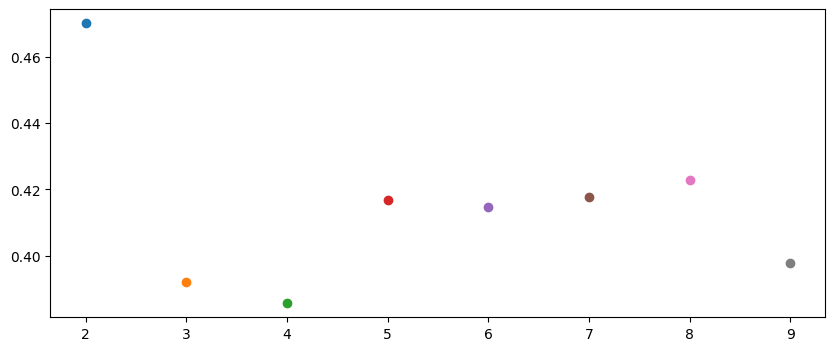

In [21]:
plt.figure(figsize=(10,4))
for i in range(2,10):
  plt.scatter(i,l[i-2])
  plt.plot(i,l[i-2])
plt.show()

In [22]:
m=[]
for i in range(2,10):
  model=KMeans(n_clusters=i)
  model.fit(scaled_fearures)
  m.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

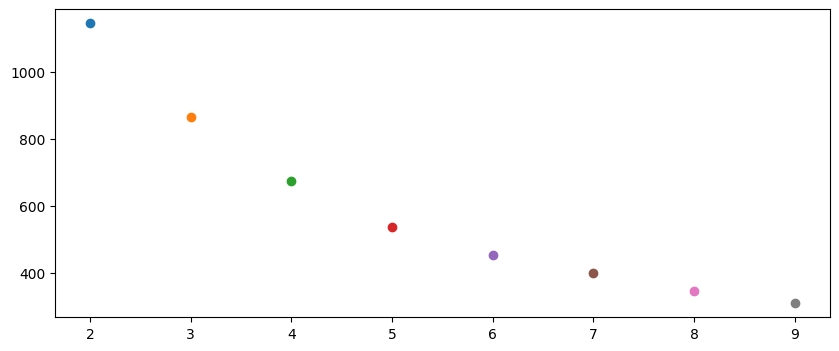

In [24]:
plt.figure(figsize=(10,4))
for i in range(2,10):
  plt.scatter(i,m[i-2])
plt.show()
#8 seems to be the best k for this model

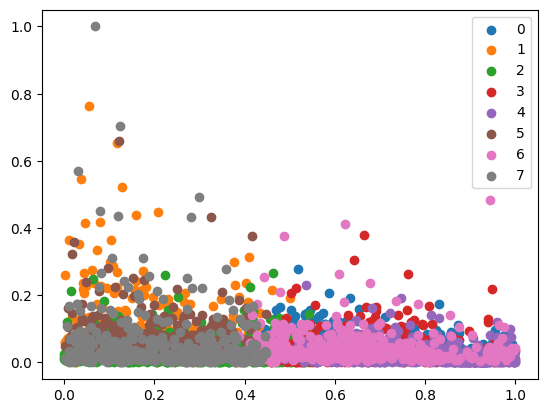

In [30]:

for i in range(8):
  plt.scatter(scaled_fearures[label == i , 0] , scaled_fearures[label == i , 1] , label = i)
plt.legend()
plt.show()

#**Hierarchial Clustering**

In [41]:
model2=AgglomerativeClustering(n_clusters=2,affinity="l2",linkage="complete")
label=model2.fit_predict(scaled_fearures)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [42]:
l=[]
for i in range(2,10):
  l.append(silhouette_score(scaled_fearures,AgglomerativeClustering(n_clusters=i,affinity="l2",linkage="complete").fit_predict(scaled_fearures)))
l

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

[0.46765873557390897,
 0.4658447823503042,
 0.4121977176126768,
 0.3295970607385797,
 0.3580167918228245,
 0.3522389968274814,
 0.3529518878490245,
 0.345596483936392]

In [36]:
#2 clusters seems appropriate for this

In [43]:
label

array([1, 1, 1, ..., 0, 1, 1])

[0 1]
<class 'numpy.ndarray'>


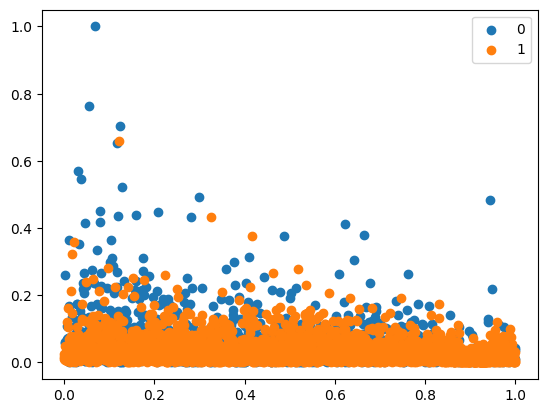

In [45]:
label1=np.unique(label)
print(label1)
label3=list(label1)
print(type(label1))
for i in range(2):
  plt.scatter(scaled_fearures[label == i , 0] , scaled_fearures[label == i , 1] , label = i)
plt.legend()
plt.show()

In [46]:
d={'Balance':airline['Balance'],'Qual_miles':airline['Qual_miles'],'cc1_miles':airline['cc1_miles'],'cc2_miles':airline['cc2_miles'],'cc3_miles':airline['cc3_miles'],'cluster':label}
df=pd.DataFrame(data=d).sort_values(by='cluster')
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,cluster
1999,327126,1452,5,1,1,0
3162,103203,0,1,1,1,0
3165,194816,0,1,1,1,0
1505,391222,0,3,1,1,0
1503,507371,0,4,1,1,0
...,...,...,...,...,...,...
1759,36254,0,1,1,1,1
1761,11512,0,1,1,1,1
1762,1703,0,1,1,1,1
1768,99336,0,3,1,1,1


In [47]:
#INFERENCE OF Hierarchial Clustering
len=2
l=[]
k=[]
for i in range(len):
  l.append(i)
  k.append(list(label).count(i))
df1={'cluster':l,'states_count':k}
df2=pd.DataFrame(data=df1)
df2

,cluster,states_count
0,0,1471
1,1,2528


#**DBSCAN**

In [48]:
model3=DBSCAN(metric='euclidean',min_samples=3,eps=0.28)
label=model3.fit_predict(scaled_fearures)
label

array([0, 0, 0, ..., 1, 0, 0])

In [68]:
np.unique(list(label))

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [50]:
from sklearn.neighbors import NearestNeighbors

In [51]:
#to check appropriate vale of epsilon
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(scaled_fearures)
distances, indices = neighbors_fit.kneighbors(scaled_fearures)

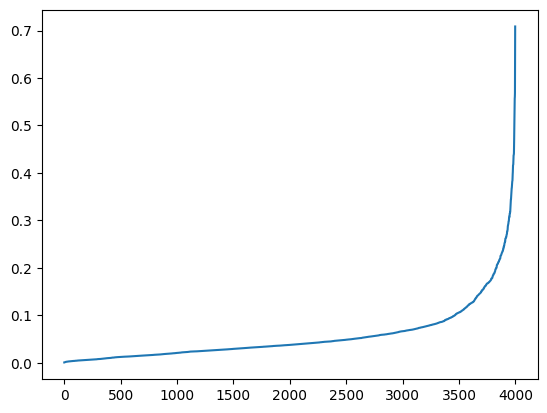

In [52]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

[0 1]


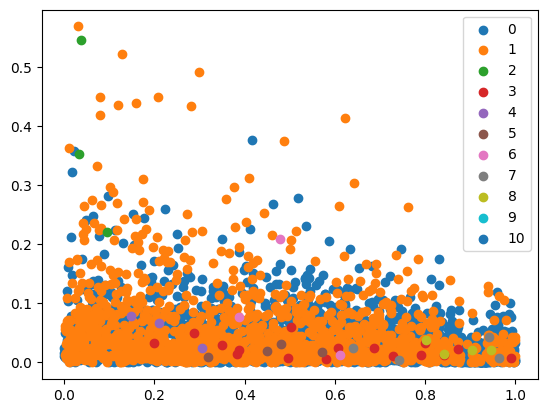

In [69]:
#label1=set(label)
print(label1)
for i in range(11):
  plt.scatter(scaled_fearures[label == i , 0] , scaled_fearures[label == i , 1] , label = i)
plt.legend()
plt.show()

In [70]:
d={'Balance':airline['Balance'],'Qual_miles':airline['Qual_miles'],'cc1_miles':airline['cc1_miles'],'cc2_miles':airline['cc2_miles'],'cc3_miles':airline['cc3_miles'],'cluster':label}
df=pd.DataFrame(data=d).sort_values(by='cluster')
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,cluster
850,25629,0,4,1,5,-1
2473,200089,4727,5,1,1,-1
1878,128302,0,5,1,4,-1
1337,128664,8019,4,1,1,-1
1529,57857,1099,1,1,1,-1
...,...,...,...,...,...,...
2557,42966,0,1,2,1,7
3779,35850,0,1,3,1,8
3203,64924,0,1,3,1,8
3611,37300,0,1,3,1,8


In [74]:
#INFERENCE OF DBSCAN
len=9
l=[]
k=[]
for i in range(-1,len):
  l.append(i)
  k.append(list(label).count(i))
df1={'cluster':l,'states_count':k}
df2=pd.DataFrame(data=df1)
df2

,cluster,states_count
0,-1,86
1,0,2471
2,1,1405
3,2,3
4,3,16
5,4,3
6,5,4
7,6,3
8,7,4
9,8,4
